In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [29]:
raw_data = pd.read_csv('teleCust1000t.csv')
raw_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [30]:
raw_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [31]:
columns_inputs = raw_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
columns_inputs

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [32]:
#SCALING
scaled_inputs = preprocessing.StandardScaler().fit(columns_inputs).transform(columns_inputs.astype(float))

targets = raw_data['custcat'].values

In [33]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_inputs,targets, test_size=0.2, random_state=69)

In [40]:
#KNN Neighbour
from sklearn.neighbors import KNeighborsClassifier
k=5
neigh  = KNeighborsClassifier(k).fit(x_train,y_train)

#PREDICTIONS
y_pred = neigh.predict(x_test)
y_pred

array([1, 4, 4, 4, 1, 4, 1, 3, 1, 3, 1, 1, 4, 1, 1, 2, 3, 4, 1, 1, 1, 1,
       3, 4, 4, 1, 3, 3, 2, 2, 2, 1, 4, 1, 2, 2, 4, 1, 4, 3, 4, 4, 3, 1,
       2, 4, 2, 1, 3, 3, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 1, 3, 2, 3, 2, 4,
       4, 1, 4, 3, 2, 1, 1, 2, 4, 2, 2, 2, 3, 4, 1, 1, 1, 2, 4, 2, 2, 2,
       1, 4, 3, 3, 1, 4, 1, 1, 4, 2, 3, 2, 1, 1, 1, 4, 1, 3, 4, 2, 3, 1,
       4, 3, 3, 1, 3, 3, 3, 2, 3, 2, 1, 3, 3, 2, 4, 2, 4, 1, 3, 3, 3, 1,
       2, 2, 2, 4, 2, 4, 1, 1, 4, 3, 2, 4, 2, 3, 3, 1, 2, 1, 2, 3, 1, 1,
       1, 1, 4, 4, 1, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 4, 2, 3, 3, 3, 4, 4,
       4, 3, 3, 2, 4, 1, 1, 4, 2, 2, 3, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 1,
       1, 1])

In [41]:
#ACCURACY
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.54625
Test set Accuracy:  0.32


In [42]:
#FINDING BEST K
ks = 10
mean_acc = np.zeros((ks-1))
std_acc  = np.zeros((ks-1))

for i in range(1,ks):
       neigh = KNeighborsClassifier(i).fit(x_train,y_train)
       y_pred = neigh.predict(x_test)
       mean_acc[i-1] = metrics.accuracy_score(y_test,y_pred)
       std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.285, 0.345, 0.33 , 0.31 , 0.32 , 0.325, 0.315, 0.32 , 0.325])

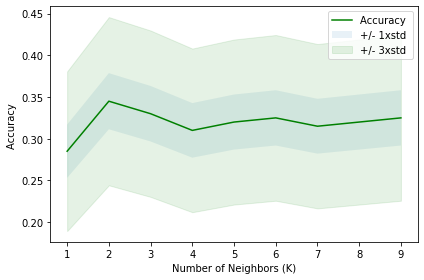

The best accuracy was with 0.345 with k= 2


In [45]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)